# Лабораторная работа 1

## Краткое описание датасета

Для исследования был выбран датасет "Данные выборки роста и веса на Тайване, 2017–2020 гг.". Этот набор данных представляет собой синтетический набор данных, созданный на основе выборочной статистики Министерства здравоохранения и социального обеспечения Тайваня. Он включает данные о росте, весе, ИМТ и возрасте людей, что делает его пригодным для различных анализов, связанных со здоровьем.

### Предметная область

Датасет попадает в предметную область антропометрии — раздела науки, который занимается измерением физических характеристик человека (таких как рост, вес и другие параметры тела).

### Источник данных

Датасет был взят из источника kaggle. Данный датасет можно найти по ссылке https://www.kaggle.com/datasets/taweilo/taiwan-wright-and-weight-sampling-data. Сами данные были взяты из выборочной статистики Министерства здравоохранения и социального обеспечения Тайваня.

### Характер данных

Данные реальные, так как взяты из выборочной статистики Министерства здравоохранения и социального обеспечения Тайваня. Он включает данные о росте, весе, ИМТ и возрасте людей.

### Атрибуты 

- yr - возраст индивидуума - Integer (числовой тип)
- height - рост человека в сантиметрах - Float (числовой тип)
- weight - вес человека в килограммах - Float (числовой тип)
- bmi - индекс массы тела (ИМТ) - Float (числовой тип)
- gender - категориальное гендерное значение (0: женский, 1: мужской) - Integer (числовой тип)

### Цели анализа

- Исследование корреляции между ростом и весом
- Прогнозирование веса по росту
- Классификация или сегментация по антропометрическим данным

## Анализ

Откроем файл:

In [30]:
import pandas as pd
file = pd.read_csv('2017_2020_bmi.csv')
file.head()

,yr,height,weight,bmi,gender
0,0,69.96,10.29,21.02,1
1,0,71.69,10.89,21.19,1
2,0,68.54,10.93,23.27,1
3,0,69.69,9.38,19.31,1
4,0,71.30,7.93,15.59,1


Проверим метаданные и количество пустых полей:

In [19]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7770 entries, 0 to 7769
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   yr      7770 non-null   object 
 1   height  7770 non-null   float64
 2   weight  7770 non-null   float64
 3   bmi     7770 non-null   float64
 4   gender  7770 non-null   int64  
dtypes: float64(3), int64(1), object(1)
memory usage: 273.2+ KB


Интересно, что yr - не тип данных int, как заявлялось в метаданных. Значит, мы не будем использовать yr в анализе.

### Среднее значение и СКО

Определить среднее значение и СКО можно у тех атрибутов, у которых числовой тип данных. Будем определять у атрибутов: height, weight, bmi, gender. 
1) mean - среднее значение 
2) STD - СКО

In [11]:
import numpy as np

In [12]:
attributes = [file['height'],
            file['weight'],
            file['bmi'],
            file['gender']]

for a in attributes:
    print(f"{a.name} mean = {np.mean(a)}")
    print(f"{a.name} STD = {np.std(a)}")
    print("\n")

height mean = 150.46069755469756
height STD = 22.462143255756285


weight mean = 52.81742342342342
weight STD = 18.355739450142305


bmi mean = 22.074586872586874
bmi STD = 3.5154954967073273


gender mean = 0.49922779922779925
gender STD = 0.49999940370561186




### Гистограммы распределения значений

In [13]:
import matplotlib.pyplot as plt

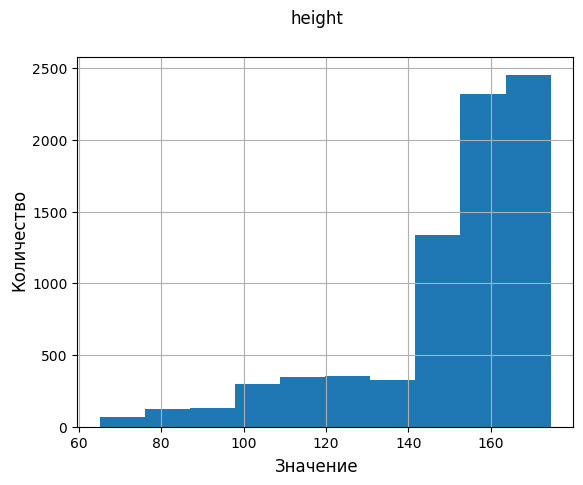

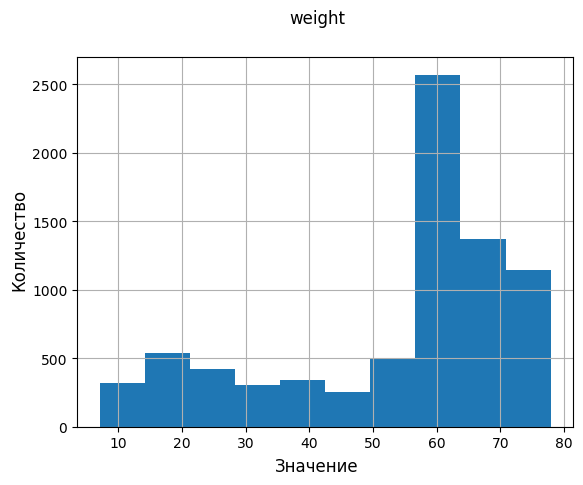

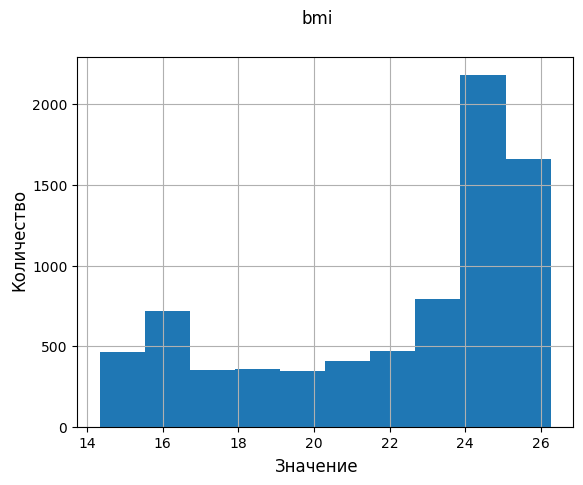

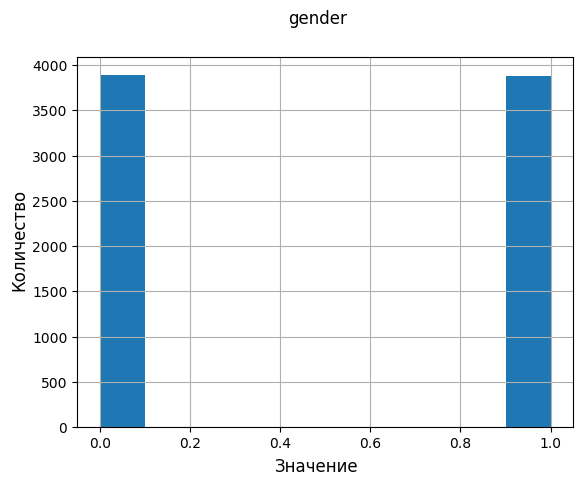

In [14]:
for a in attributes:
    fig = plt.figure()
    fig.suptitle(a.name)
    fig.supxlabel("Значение")
    fig.supylabel("Количество")
    a.hist()

### Выбросы

Определим, есть ли выбросы. Для этого будем использовать Z-score (или Z-оценку). Это показатель, используемый для определения, насколько далеко значение отклоняется от среднего значения набора данных, измеренное в стандартных отклонениях.

In [15]:
import scipy

In [16]:
from scipy import stats

for a in attributes:
    clean_a = a[np.abs(stats.zscore(a)) < 2]
    print(f"Количество строк, где есть выбросы ({a.name}): {len(a)}")
    print(f"Количество строк без выбросов ({a.name}): {len(clean_a)}")
    print("\n")

Количество строк, где есть выбросы (height): 7770
Количество строк без выбросов (height): 7262


Количество строк, где есть выбросы (weight): 7770
Количество строк без выбросов (weight): 7336


Количество строк, где есть выбросы (bmi): 7770
Количество строк без выбросов (bmi): 7655


Количество строк, где есть выбросы (gender): 7770
Количество строк без выбросов (gender): 7770




Проверим, есть ли пропущенные значения:

In [24]:
file.isnull().sum()

yr        0
height    0
weight    0
bmi       0
gender    0
dtype: int64

Таким образом, отсутствующих значений нет.

## Корреляция между параметрами

### Матрица графиков рассеивания

Построим матрицу графиков рассеивания

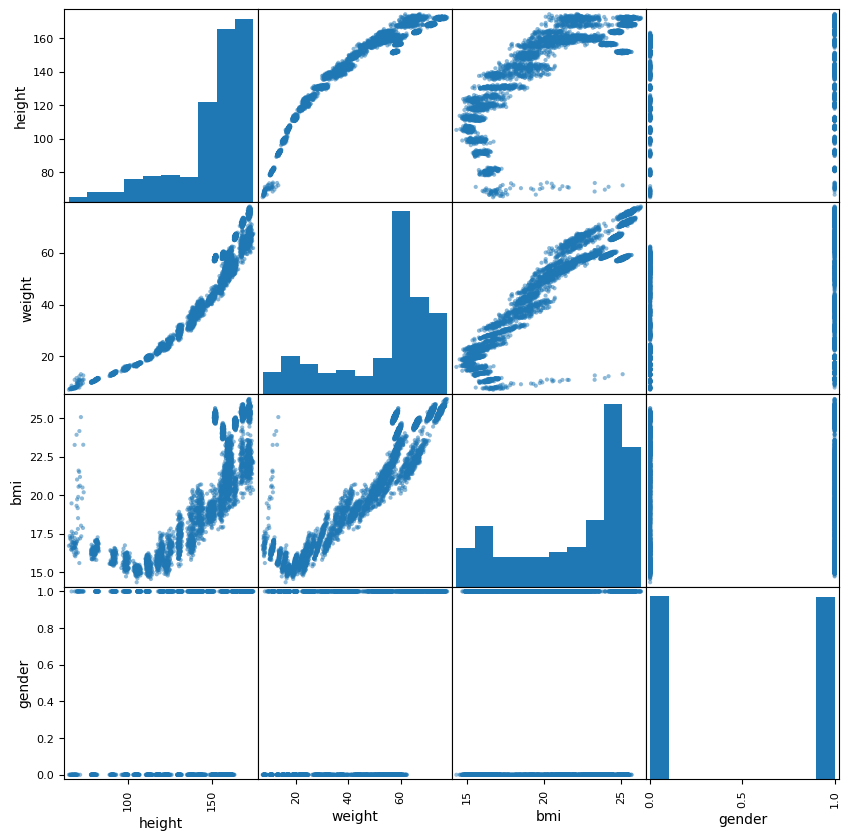

In [69]:
scatter_frame = pd.DataFrame({
    "height": attributes[0],
    "weight": attributes[1],
    "bmi": attributes[2],
    "gender": attributes[3],
})

scatter_matrix = pd.plotting.scatter_matrix(
    scatter_frame,
    figsize=(10, 10) 
)

По матрице графиков рассеивания мы уже можем определить характер и степень корреляции, но мы любим точность, а еще знаем крутой способ получить точные значения в удобном виде - тепловая матрица корреляций. Построим ее и определим характер и степень корреляции, параллельно смотря на графики рассеивания, чтобы сравнить результаты. Затем будем анализировать корреляцию.

### Матрица корреляций

In [59]:
import matplotlib.pyplot as plt

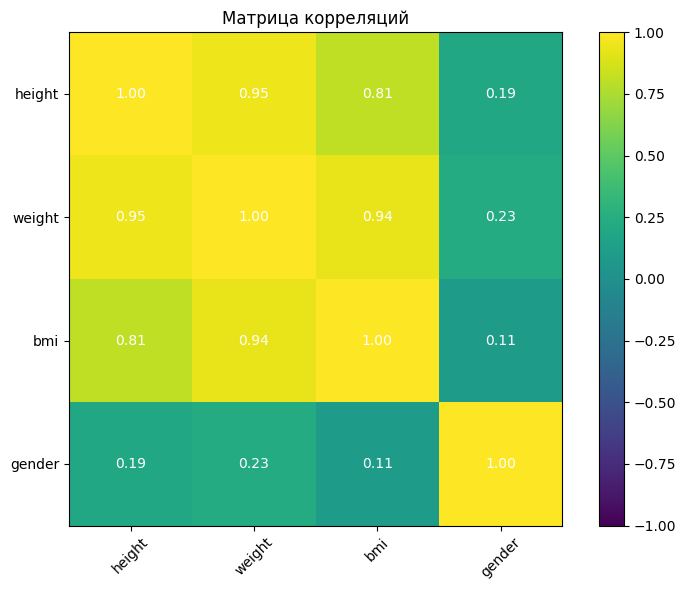

In [67]:
from matplotlib.colors import LinearSegmentedColormap
corr = scatter_frame.corr()
plt.figure(figsize=(8, 6))
cax = plt.imshow(corr, cmap='viridis', interpolation='nearest', vmin=-1, vmax=1) 
plt.colorbar(cax)
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)

for (i, j), val in np.ndenumerate(corr.values):
    plt.text(j, i, f"{val:.2f}", ha='center', va='center', color='white')

plt.title('Матрица корреляций')
plt.tight_layout() 
plt.show()

### Анализ корреляций

В основном будем анализировать по матрице корреляций, но параллельно будем смотреть на матрицу графиков рассеивания и сравнивать результаты. Таким образом будет наиболее точный анализ.

Для классификации корреляций на сильные, слабые и умеренные обычно используются следующие диапазоны коэффициента корреляции, который варьируется от -1 до 1:
1) Высокая корреляция:
- Прямая корреляция: от 0.7 до 1.0
- Обратная корреляция: от -0.7 до -1.0
2) Средняя корреляция:
- Прямая корреляция: от 0.3 до 0.7
- Обратная корреляция: от -0.3 до -0.7
3) Слабая корреляция:
- Прямая корреляция: от 0.1 до 0.3
- Обратная корреляция: от -0.1 до -0.3
4) Отсутствие корреляции:
- Прямая корреляция: от 0 до 0.1
- Обратная корреляция: от 0 до -0.1

Таким образом, 
1) Высокая корреляция:
   - height и weight (0,95). Корреляция прямая. Связано с тем, что чем выше рост человека, тем больше он весит в основном.
   - height и bmi (0,81). Корреляция прямая. Связано с тем, что рост и ИМТ могут иметь положительную корреляцию в определённых контекстах, особенно когда рассматривается вес в рамках общей популяции.
   - weight и bmi (0,94). Корреляция прямая. Связано с тем, что ИМТ рассчитывается непосредственно на основе веса.
2) Слабая корреляция:
   - height и gender (0,19). Корреляция прямая. Связано с тем, что хотя пол влияет на средний рост (например, мужчины, как правило, выше женщин), индивидуальные различия в росте могут быть значительными. 
   - weight и gender (0,23). Корреляция прямая. Объяснение, как и в предыдущем примере - индивидуальные различия в весе могут быть значительными
   - bmi и gender (0,11). Корреляция прямая. Объяснение, как и в предыдущем примере - индивидуальные различия могут быть значительными

## Вывод

В ходе данной лабораторной работы мы научились обрабатывать и анализировать данные, а также представлять их в визуально удобном виде. Был исследован датасет "Данные выборки роста и веса на Тайване, 2017–2020 гг.". Этот набор данных представляет собой синтетический набор данных, созданный на основе выборочной статистики Министерства здравоохранения и социального обеспечения Тайваня. Он включает данные о росте, весе, ИМТ и возрасте людей, что делает его пригодным для различных анализов, связанных со здоровьем. В итоге мы исследовали корреляцию между ростом, весом, имт и полом людей и поняли, что пол мало на что влияет, потому что индивидуальные различия чаще всего могут быть значительными и не зависеть от пола.